# 과제2. Mobile 고객 이탈 분석

* 고객 이탈여부(CHURN)에 영향을 주는 요인을 분석하고자 합니다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [2]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
mobile = pd.read_csv(data_path)
mobile.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0)	|feature		|
|	INCOME	|	연 수입액(달러)	|feature		|
|	OVERAGE	|	월 초과사용 시간(분)	|feature		|
|	LEFTOVER	|	월 사용 잔여시간(분)	|feature		|
|	HOUSE	|	집 가격(달러)	|feature		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|feature		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|feature		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )	|feature		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it')	|feature		|
|	**CHURN**	|	**이탈여부(1 : 이탈, 0 : 잔류)**	|	**Target**	|


----

## 1.가설수립

* 여기서는 가설을 간략히 수립합니다.
    * 숫자형, 범주형 각각 최소 2개 이상씩, 전체 5개의 feature를 도출, 가설을 수립하시오.

* 가설1 : 만족도 설문에 따른 이탈여부는 관계가 없다.

* 가설2 : 변경 계획 설문에 따른 이탈여부는 관계가 없다.

* 가설3 : 월 초과사용 시간은 이탈여부와 관계가 없다.

* 가설4 : 월 사용 잔여시간은 이탈여부와 관계가 없다.

* 가설5 : 평균 통화시간과 이탈여부는 관계가 없다.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) feature1_REPORTED_SATISFACTION

In [81]:
feature = mobile['REPORTED_SATISFACTION']

① 변수의 비즈니스 의미

> 만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )

② 숫자, 범주?

> 범주

③ NaN 존재 유무

In [6]:
feature.isna().sum()

38

> NaN 38개 있음  
> - 조치 방안 -> NaN 제거

In [8]:
feature.dropna(axis=0, inplace=True)
feature.isna().sum()

④ 기초통계량(수치화)

In [12]:
print('범주별 빈도수')
print(feature.value_counts())

print('---'*10)
print('---'*10)

print('범주별 비율')
print(feature.value_counts() / len(feature))

범주별 빈도수
very_unsat    7072
very_sat      4562
unsat         3590
avg           1806
sat            932
Name: REPORTED_SATISFACTION, dtype: int64
------------------------------
------------------------------
범주별 비율
very_unsat    0.393720
very_sat      0.253981
unsat         0.199866
avg           0.100546
sat           0.051887
Name: REPORTED_SATISFACTION, dtype: float64


⑤ 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


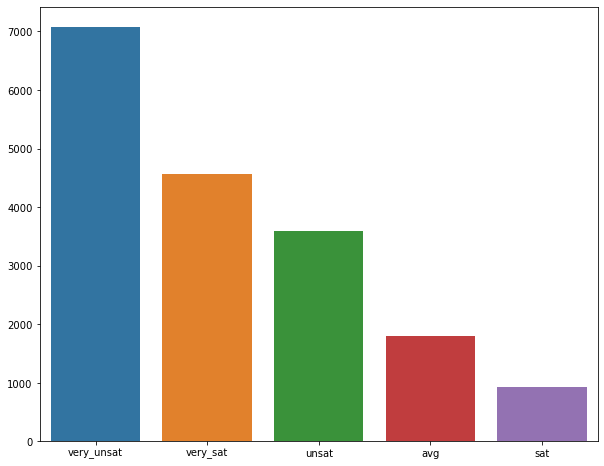

In [67]:
plt.figure(figsize=(10, 8))
cnt = feature.value_counts()
sns.barplot(cnt.index, cnt.values)
plt.show()

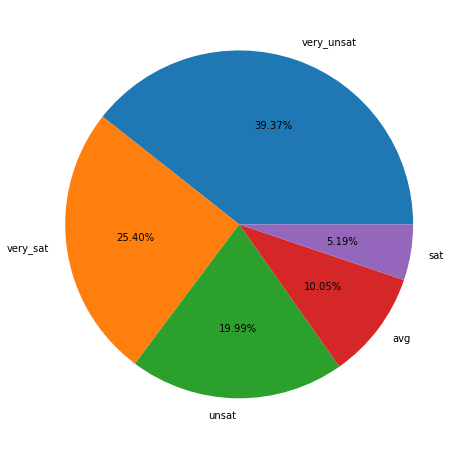

In [68]:
plt.figure(figsize=(10, 8))
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%')
plt.show()

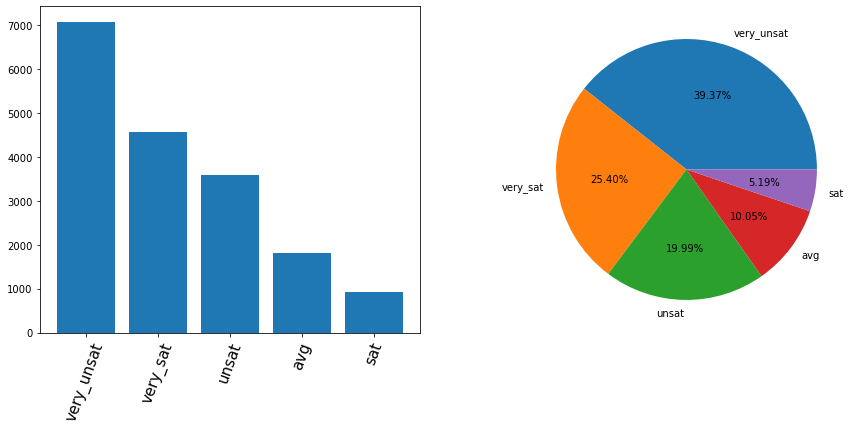

In [84]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
cnt = feature.value_counts()
plt.bar(cnt.index, cnt.values)
plt.xticks(fontsize=15,rotation=70)

plt.subplot(1, 2, 2)
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%')
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 만족도 설문에서, '매우 불만족'이 39%로 1위인 것은 이동통신망 서비스에 개선이 필요하다고 보인다. 
> - '매우 불만족' 고객을 대상으로 어떤 점이 불만이었는지 설문을 받고, 공통된 내용(ex. 요금제, 데이터 품질)을 중점으로 개선을 해야할 필요성이 있다.
> - '매우 만족'인 고객이 25%로 2위인 것은
> - '매우 불만족'과 '불만족'의 합이 약 58%로 전체 고객의 반 이상이 이동통신망 서비스에 만족하지 않는다는 것을 표한다

⑦ 추가 분석해 볼 사항이 있나요?

> - '매우 불만족' 고객과 '불만족' 고객의 이탈률이 어느정도인지 분석해본다.

### 2) feature2_CONSIDERING_CHANGE_OF_PLAN

In [86]:
feature = mobile['CONSIDERING_CHANGE_OF_PLAN']

① 변수의 비즈니스 의미

> 변경 계획 설문('never_thought', 'no', 'perhaps', 'considering', 'actively_looking_into_it')

② 숫자, 범주?

> 범주

③ NaN 존재 유무

In [87]:
feature.isna().sum()

0

> NaN 없음

④ 기초통계량(수치화)

In [88]:
print('범주별 빈도수')
print(feature.value_counts())

print('---'*10)
print('---'*10)

print('범주별 비율')
print(feature.value_counts() / len(feature))

범주별 빈도수
considering                 7141
actively_looking_into_it    4453
no                          3644
never_thought               1804
perhaps                      958
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: int64
------------------------------
------------------------------
범주별 비율
considering                 0.396722
actively_looking_into_it    0.247389
no                          0.202444
never_thought               0.100222
perhaps                     0.053222
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: float64


⑤ 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


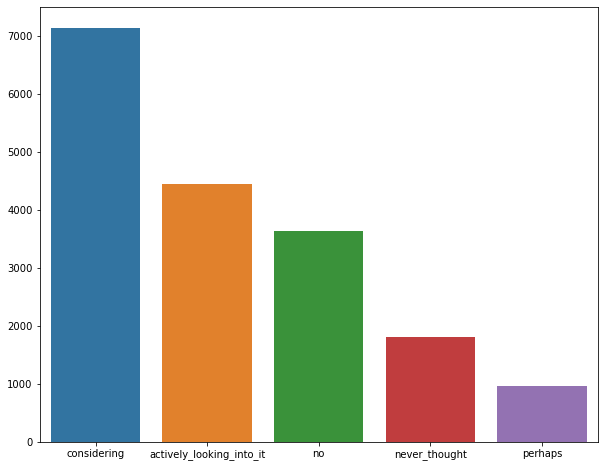

In [89]:
plt.figure(figsize=(10, 8))
cnt = feature.value_counts()
sns.barplot(cnt.index, cnt.values)
plt.show()

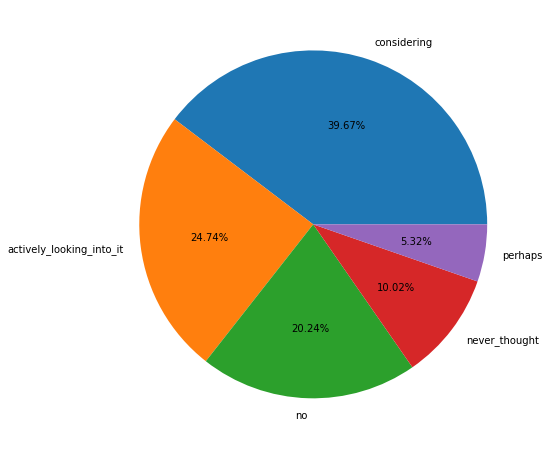

In [90]:
plt.figure(figsize=(10, 8))
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%')
plt.show()

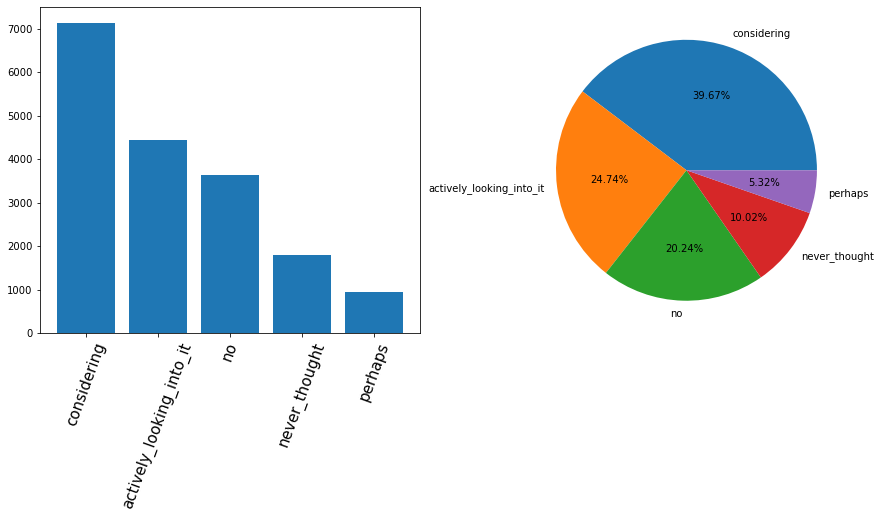

In [91]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
cnt = feature.value_counts()
plt.bar(cnt.index, cnt.values)
plt.xticks(rotation=70, fontsize=15)

plt.subplot(1, 2, 2)
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%')
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - '고려중'인 고객이 39%(1위)로 고객이 이탈하지 않을 가능성도 충분히 존재하기 때문에 이러한 고객 대상으로 휴대폰 기기, 요금제, 부가서비스 프로모션 등으로 고객을 잡는다.
> - '적극 찾아보는 중'인 고객이 24%(2위)로 타 통신사와 알뜰폰의 요금제, 부가서비스 등을 비교해서 장단점을 명확히 한다.

⑦ 추가 분석해 볼 사항이 있나요?

> - 조사 결과에서 이탈가능성이 있는 '고려중' 고객과 '적극 찾아보는 중'인 고객의 평균 통화시간, 월 사용 잔여시간, 요금제 등을 분석하여 타 통신사와 비교해본다.

### 3) feature3_OVERAGE

In [100]:
feature = mobile['OVERAGE']

① 변수의 비즈니스 의미

> 월 초과사용 시간(분)

② 숫자, 범주?

> 숫자

③ NaN 존재 유무

In [101]:
feature.isna().sum()

0

> NaN 없음

④ 기초통계량(수치화)

In [102]:
feature.describe()

count    18000.000000
mean        86.014833
std         85.963981
min         -2.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64

> - 최솟값이 -2 이므로 NaN 처리함
> - --> 조치 방안 : 제거

In [103]:
feature = feature[feature >=0]
feature.describe()

count    17999.000000
mean        86.019723
std         85.963866
min          0.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64

⑤ 분포 확인(시각화)

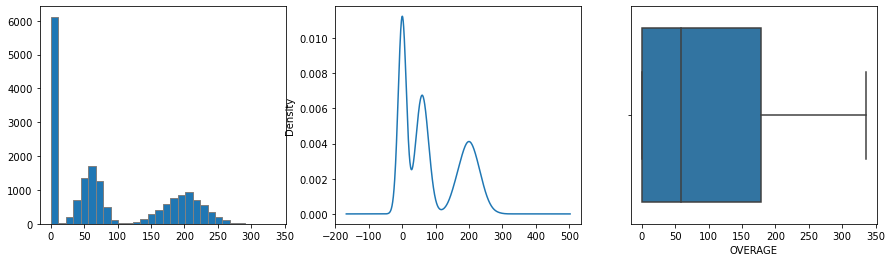

In [104]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.hist(feature, bins = 30, edgecolor = 'gray')

plt.subplot(1, 3, 2)
feature.plot(kind = 'kde')

plt.subplot(1, 3, 3)
sns.boxplot(x=feature, data=mobile)
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 히스토그램 결과, 3가지 그룹으로 나뉘는 것을 볼 수 있다
> - 월 평균 초과사용하는 고객에게 기존 사용하는 요금제보다 한,두단계 높은 요금제를 추천하여 고객 입장에서 월 평균 요금이 감소도록 하는 효과를 볼 수 있도록 한다.
> - 월 평균 초과가 0인 고객에게는 단기간적으로는 기업입장에서 손해일 수 있지만 기존 사용하는 요금제에서 하향 단계에 있는 요금제를 추천드려서 장기고객으로 유도하도록 한다.

⑦ 추가 분석해 볼 사항이 있나요?

> - 3가지 그룹으로 나눠서 월 초과사용 시간과 이탈여부가 관련 있는지 분석해본다.

### 4) feature4_LEFTOVER

In [105]:
feature = mobile['LEFTOVER']

① 변수의 비즈니스 의미

> 월 사용 잔여시간(분)

② 숫자, 범주?

> 숫자

③ NaN 존재 유무

In [106]:
feature.isna().sum()

0

> NaN 없음

④ 기초통계량(수치화)

In [107]:
feature.describe()

count    18000.000000
mean        23.995500
std         26.860363
min          0.000000
25%          0.000000
50%         14.500000
75%         42.000000
max         89.000000
Name: LEFTOVER, dtype: float64

⑤ 분포 확인(시각화)

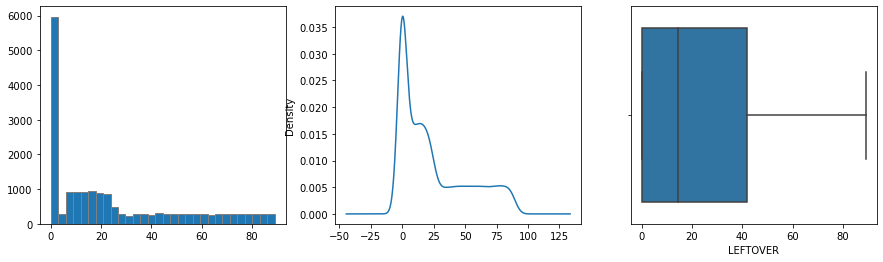

In [108]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.hist(feature, bins = 30, edgecolor = 'gray')

plt.subplot(1, 3, 2)
feature.plot(kind = 'kde')

plt.subplot(1, 3, 3)
sns.boxplot(x=feature, data=mobile)
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 월 사용 잔여시간이 0인 고객이 많다.
> -   --> 이러한 고객에게 기존 요금제보다 상향 요금제를 추천해드린다.

⑦ 추가 분석해 볼 사항이 있나요?

> 월 사용 잔여시간이 없는 고객과 있는 고객 범주를 2개로 나눠서 이탈여부에 대해 분석해본다

### 5) feature5_AVERAGE_CALL_DURATION

In [109]:
feature = mobile['AVERAGE_CALL_DURATION']

① 변수의 비즈니스 의미

> 평균 통화시간(분)

② 숫자, 범주?

> 숫자

③ NaN 존재 유무

In [110]:
feature.isna().sum()

0

④ 기초통계량(수치화)

In [111]:
feature.describe()

count    18000.000000
mean         5.990944
std          4.398894
min          1.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         15.000000
Name: AVERAGE_CALL_DURATION, dtype: float64

⑤ 분포 확인(시각화)

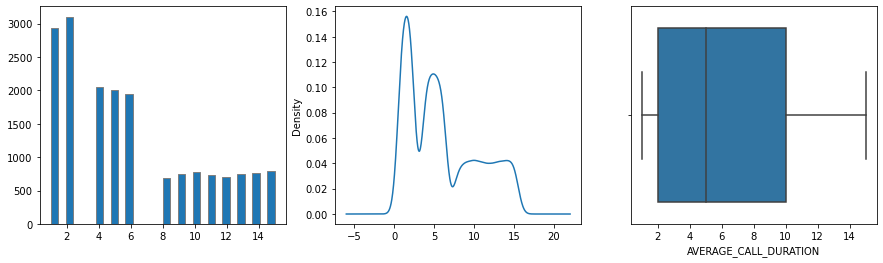

In [112]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.hist(feature, bins = 30, edgecolor = 'gray')

plt.subplot(1, 3, 2)
feature.plot(kind = 'kde')

plt.subplot(1, 3, 3)
sns.boxplot(x=feature, data=mobile)
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 

⑦ 추가 분석해 볼 사항이 있나요?

### 6) target

In [113]:
target = mobile['CHURN']

① 변수의 비즈니스 의미

> 이탈여부(1 : 이탈, 0 : 잔류)

② 숫자, 범주?

> 범주

③ NaN 존재 유무

In [114]:
target.isna().sum()

0

> NaN 없음

④ 기초통계량(수치화)

In [116]:
print('범주별 빈도수')
print(target.value_counts())

print('---'*10)
print('---'*10)

print('범주별 비율')
print(target.value_counts() / len(target))

범주별 빈도수
0    9131
1    8869
Name: CHURN, dtype: int64
------------------------------
------------------------------
범주별 비율
0    0.507278
1    0.492722
Name: CHURN, dtype: float64


⑤ 분포 확인(시각화)

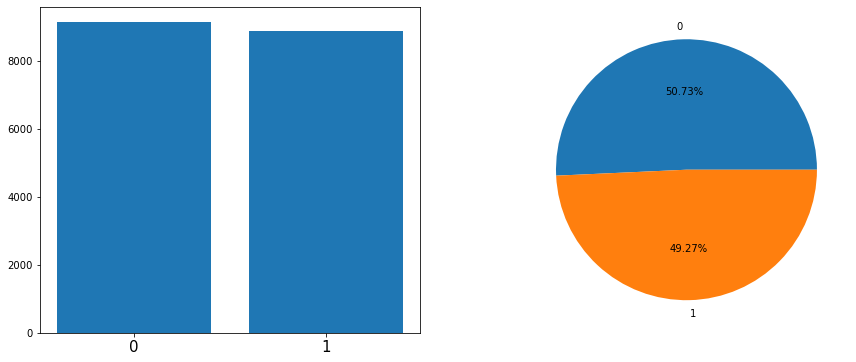

In [77]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
cnt = target.value_counts()
plt.bar(cnt.index, cnt.values)
plt.xticks(cnt.index, fontsize=15)

plt.subplot(1, 2, 2)
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%')
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 이탈하는 고객이 전체의 49%로 상당수를 차지한다.
> - 이탈하시는 고객을 대상으로 이탈하는 이유를 설문조사하고 공통적으로 나온 이유에 대해 보완이 필요해 보인다.

⑦ 추가 분석해 볼 사항이 있나요?

> - 충성고객의 이탈률을 분석해본다.

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

### (1) 범주형 Feature --> CHURN
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

In [119]:
# 전체 이탈율
total_mean = target.mean()
print('전체 이탈율 :', total_mean)

전체 이탈율 : 0.49272222222222223


#### 1) REPORTED_SATISFACTION --> CHURN

In [154]:
feature = mobile['REPORTED_SATISFACTION']

① 교차표(pd.crosstab())

In [155]:
temp = pd.crosstab(feature, target, normalize = 'index')
print(temp)

CHURN                         0         1
REPORTED_SATISFACTION                    
avg                    0.527132  0.472868
sat                    0.527897  0.472103
unsat                  0.499164  0.500836
very_sat               0.511618  0.488382
very_unsat             0.500990  0.499010


② 시각화( Stacked Bar, Mosaic)

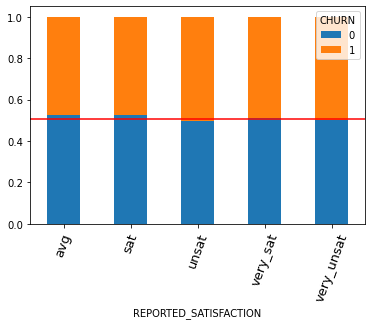

In [156]:
temp.plot.bar(stacked=True)
plt.axhline(1-total_mean, color = 'r')
plt.xticks(fontsize=13, rotation=70)
plt.show()

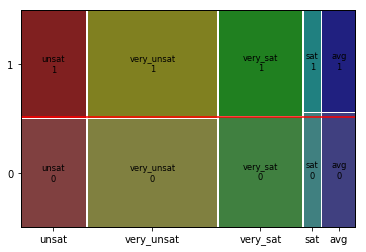

In [157]:
mosaic(mobile, [ 'REPORTED_SATISFACTION','CHURN'])
plt.axhline(1- total_mean, color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> - 만족도 설문에 따라서 이탈여부는 관련이 없어보인다.
> -  --> 말과 행동이 다르다..?
> - '매우 만족'으로 답한 고객이 '불만'으로 답한 고객보다 이탈율이 높은 것을 볼 수 있다

③ 가설검정(카이제곱검정)

In [126]:
result = spst.chi2_contingency(temp)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

카이제곱통계량 0.003036407134958626
p-value 0.9999988486947571
기대빈도
 [[0.51336013 0.48663987]
 [0.51336013 0.48663987]
 [0.51336013 0.48663987]
 [0.51336013 0.48663987]
 [0.51336013 0.48663987]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> - 카이제곱 검정 결과 p-value가 0.05보다 매우 크기 때문에 만족도 설문에 따라서 이탈여부는 관계가 없어보인다.

#### 2) CONSIDERING_CHANGE_OF_PLAN --> CHURN

In [148]:
feature = mobile['CONSIDERING_CHANGE_OF_PLAN']

① 교차표(pd.crosstab())

In [149]:
temp = pd.crosstab(feature, target, normalize = 'index')
print(temp)

CHURN                              0         1
CONSIDERING_CHANGE_OF_PLAN                    
actively_looking_into_it    0.511565  0.488435
considering                 0.510853  0.489147
never_thought               0.513304  0.486696
no                          0.500274  0.499726
perhaps                     0.475992  0.524008


② 시각화( Stacked Bar, Mosaic)

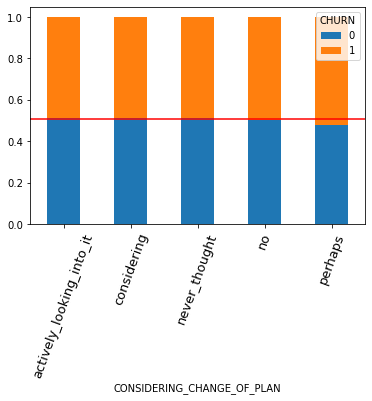

In [153]:
temp.plot.bar(stacked=True)
plt.axhline(1-total_mean, color = 'r')
plt.xticks(fontsize=13, rotation=70)
plt.show()

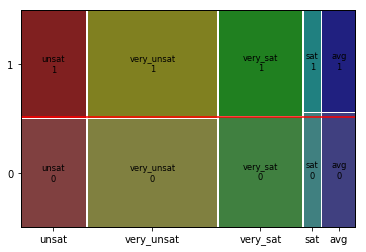

In [151]:
mosaic(mobile, [ 'REPORTED_SATISFACTION','CHURN'])
plt.axhline(1- total_mean, color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> - 변경 계획 설문은 전체평균과 차이가 없어 보이기 때문에 이탈여부와 관련이 없어 보인다. 


③ 가설검정(카이제곱검정)

In [152]:
result = spst.chi2_contingency(temp)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

카이제곱통계량 0.003905141728324712
p-value 0.9999980962131079
기대빈도
 [[0.50239758 0.49760242]
 [0.50239758 0.49760242]
 [0.50239758 0.49760242]
 [0.50239758 0.49760242]
 [0.50239758 0.49760242]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> - 카이제곱 검정 결과 p-value가 0.05보다 매우 크기 때문에 변경 계획 설문과 이탈여부는 관련이 없어보인다.

### (2) 숫자형 Feature --> CHURN

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) OVERAGE --> CHURN

In [158]:
feature = mobile['OVERAGE']

① 그래프 : histogram, densityplot

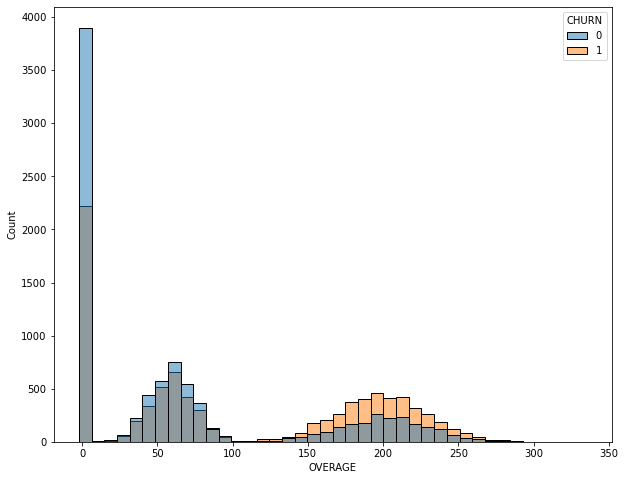

In [171]:
plt.figure(figsize=(10, 8))
sns.histplot(x='OVERAGE', data = mobile, hue = 'CHURN', bins=40)
plt.show()

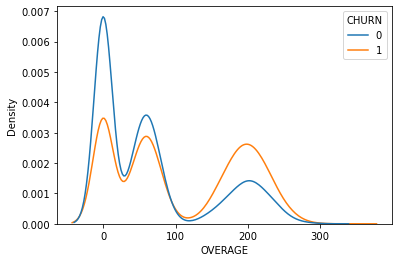

In [160]:
sns.kdeplot(x='OVERAGE', data = mobile, hue = 'CHURN')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> - 월 초과사용 시간이 약 120분 이상인 고객이 이탈율이 높아보인다.

② 수치화 : 로지스틱회귀

In [161]:
model = sm.Logit(mobile['CHURN'], mobile['OVERAGE'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.680553
         Iterations 4
OVERAGE    3.521095e-97
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> - 히스토그램과 KDE 그래프에서 약 120분 이상인 고객이 이탈율이 높은 것을 볼 수 있었다.
> - (참고) 로지스틱 회귀 결과 p-value가 0.05보다 작기 때문에, 
> - 월 초과사용 시간과 이탈여부는 관련이 있어보인다.

### [추가 분석] 월초과 사용시간 3가지 범주로 나눠서 분석

- 0과 100을 기준으로 3개의 범주로 나누기

In [197]:
# o1 = mobile.loc[mobile['OVERAGE']<= 0, 'CHURN']
# o2 = mobile.loc[(mobile['OVERAGE']> 0) & (mobile['OVERAGE']<= 100) , 'CHURN']
# o3 = mobile.loc[mobile['OVERAGE']> 100, 'CHURN']

bin = [o1, o2, o3]
mobile['o_g'] = pd.cut(mobile['OVERAGE'], bins= [-np.inf, 0, 100, np.inf], labels=list('123'))

temp = pd.crosstab(mobile['o_g'], mobile['CHURN'], normalize = 'index')
print(temp)

CHURN         0         1
o_g                      
1      0.637567  0.362433
2      0.540407  0.459593
3      0.342952  0.657048


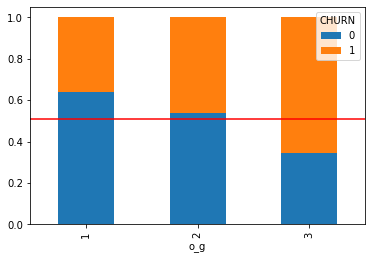

In [204]:
label = ['0', '0~100', '100']
temp.plot.bar(stacked=True)
plt.axhline(1-mobile['CHURN'].mean(), color = 'r')
plt.show()

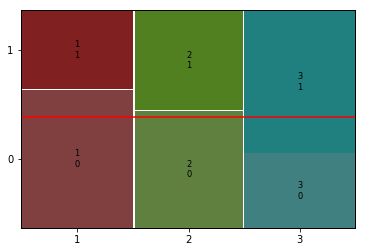

In [205]:
mosaic(mobile, ['o_g', 'CHURN' ])  # 율, 양을 같이 볼 수 있음
plt.axhline(1-mobile['CHURN'].mean(), color='r')  # 평균선
plt.show()

> - 0분과 100분을 기준으로 범주를 나누고 이탈율을 분석한 결과, 
> - 월 초과 사용시간이 100분 이상인 고객의 이탈율이 높은 것을 알 수 있다.
> - --> 이러한 고객을 대상으로 기존 사용하는 요금제보다 상향된 요금제를 추천해드리고, 장기적으로 봤을 때 이것이 더 이득이다 라는 설명을 덧붙이는 것도 좋은 방법이 될 것 같다.

#### 2) LEFTOVER --> CHURN

In [162]:
feature = mobile['LEFTOVER']

① 그래프 : histogram, densityplot

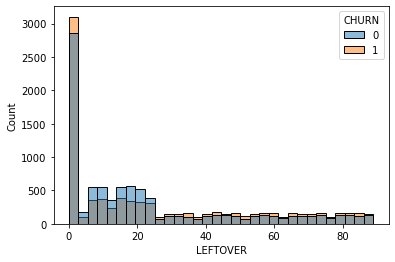

In [163]:
sns.histplot(x='LEFTOVER', data = mobile, hue = 'CHURN', bins=32)
plt.show()

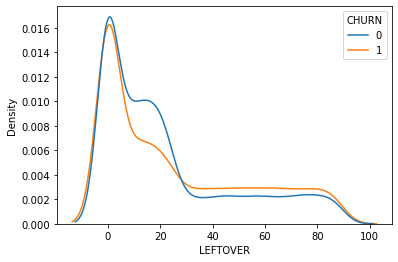

In [164]:
sns.kdeplot(x='LEFTOVER', data = mobile, hue = 'CHURN')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> - 월 사용 잔여시간이 약 30분을 기준으로 이탈율이 높아지는 것을 보인다.
> - 월 사용 잔여시간이 5~25분일 때 이탈율이 낮아지고, 이탈하지 않는 고객의 비율이 높아지는 것을 보인다.
> - --> 30분을 기준으로 요금제가 널뛰기 하는 것인가?

② 수치화 : 로지스틱회귀

In [165]:
model = sm.Logit(mobile['CHURN'], mobile['LEFTOVER'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692532
         Iterations 3
LEFTOVER    0.000003
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> - 시각화 결과, 월 사용 잔여시간과 이탈여부는 관련이 있어 보인다.
> - (참고) 로지스틱 회귀 결과, p-value가 0.05보다 작으므로 두 변수는 관련이 있어 보인다.

### [추가 분석] 월 사용 잔여시간의 여부로 범주 나누고 분석

In [209]:
mobile['l_g'] = pd.cut(mobile['LEFTOVER'], bins= [-np.inf, 0, np.inf], labels=list('12'))
mobile['l_g']
temp = pd.crosstab(mobile['l_g'], mobile['CHURN'], normalize = 'index')
print(temp)

CHURN         0         1
l_g                      
1      0.479718  0.520282
2      0.520941  0.479059


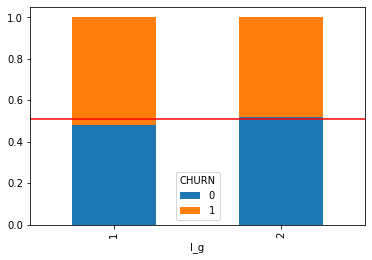

In [214]:
temp.plot.bar(stacked=True)
plt.axhline(1-mobile['CHURN'].mean(), color = 'r')
plt.show()

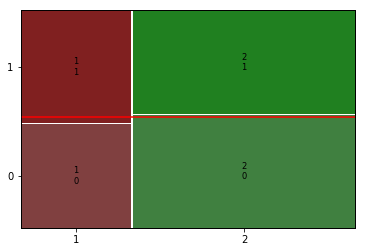

In [215]:
mosaic(mobile, ['l_g', 'CHURN' ]) 
plt.axhline(1-mobile['CHURN'].mean(), color = 'r')
plt.show()

> - 월 사용 잔여여부로 범주를 나누고 탈주율을 분석해본 결과, 
> - 그래프로 봤을 때 큰 차이가 보이진 않지만 월 사용 잔여시간이 0인 고객의 탈주율이 조금 더 높은 것을 볼 수 있다.

#### 3) AVERAGE_CALL_DURATION --> CHURN

In [166]:
feature = mobile['AVERAGE_CALL_DURATION']

① 그래프 : histogram, densityplot

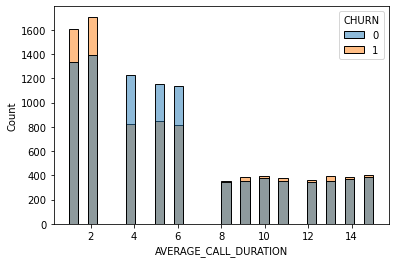

In [167]:
sns.histplot(x='AVERAGE_CALL_DURATION', data = mobile, hue = 'CHURN', bins=32)
plt.show()

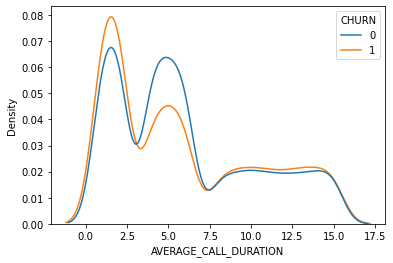

In [168]:
sns.kdeplot(x='AVERAGE_CALL_DURATION', data = mobile, hue = 'CHURN')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> - 평균 통화시간이 약 2.5분을 기준으로 이탈율이 달라지는 것을 볼 수 있다.
> -  --> 평균 통화시간이 2.5분 미만인 고객은 요금제 사용이 통화가 목적이 아닌 데이터 사용이 목적일 수 있기 때문에, 다른 요금제를 추천해드리는 서비스가 있으면 좋을 것 같다.

② 수치화 : 로지스틱회귀

In [169]:
model = sm.Logit(mobile['CHURN'], mobile['AVERAGE_CALL_DURATION'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693027
         Iterations 3
AVERAGE_CALL_DURATION    0.03783
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> - 시각화 결과, 평균 통화시간과 이탈여부는 관련이 있어 보인다.
> - (참고) 로지스틱 회귀 분석결과, p-vlaue가 0.05보다 작기 때문에 두 변수는 관련이 있어 보인다.

## 4.관계 정리

### 1) 강한관계의 변수

> - OVERAGE(월 초과사용 시간) --> CHURN
> - LEFTOVER(월 사용 잔여시간) --> CHURN
> - AVERAGE_CALL_DURATION(평균 통화시간) --> CHURN

### 2) 약한관계의 변수

### 3) 관계 없음

> - REPORTED_SATISFACTION(만족도 설문) --> CHURN
> - CONSIDERING_CHANGE_OF_PLAN(변경 계획 설문) --> CHURN

## 5.추가 분석

 - 월 초과사용 시간
     - 월 초과사용 시간을 0분과 100분을 기준으로 범주를 나누고 이탈율을 분석한 결과, 
     - 월 초과 사용시간이 100분 이상인 고객의 이탈율이 높은 것을 알 수 있다.
     - --> 이러한 고객을 대상으로 기존 사용하는 요금제보다 상향된 요금제를 추천해드리고, 장기적으로 봤을 때 이것이 더 이득이다 라는 설명을 덧붙이는 것도 좋은 방법이 될 것 같다.  
     
- 월 잔여시간
    - 월 사용 잔여여부로 범주를 나누고 탈주율을 분석해본 결과, 
    - 그래프로 봤을 때 큰 차이가 보이진 않지만 월 사용 잔여시간이 0인 고객의 탈주율이 조금 더 높은 것을 볼 수 있다.